# TP: Machine Learning (SIA_3611)

## TP3: Clustering (4h) 

by Clément Bouvier 

In machine learning, clustering is related to unsupervised learning approaches in which the algorithm fits from the distribution of given data. The main advantage of such methods is detection without a priori of patterns, sorting data and detecting outliers.

The given dataset is a combination of a dataset produced by the World Health Organization and the location of countries. It pooled the evolution of 23 features for 15 years among numerous countries. One of the goals of this TP3 is to detect continents and subcontinents.

**Objectives:**
- Visualize spatial datasets
- Apply K-Means and GMM on spatial datasets
- Normalize the datasets
- Propose a methodology to detect specific pools of data
- Evaluate the computed clustering


## STEP 1: Spatial datasets and first clusters



The first step is visualizing the mercator projection.

**TO DO 1.1**

Execute the following cells

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

df = pd.read_csv("data/Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2013)]

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles                  

C:\Users\JERM\AppData\Local\Temp\ipykernel_22612\297642897.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])


<module 'matplotlib.pyplot' from 'c:\\Users\\JERM\\anaconda3\\envs\\img_proc\\Lib\\site-packages\\matplotlib\\pyplot.py'>

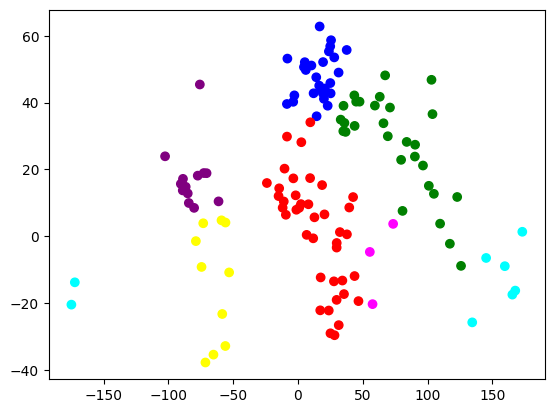

In [2]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt

In [3]:
df_X

,Longitude,Latitude
2,66.004734,33.835231
18,20.049834,41.142450
34,2.617323,28.158938
50,17.537368,-12.293361
82,-65.179807,-35.381349
...,...,...
2812,-56.018071,-32.799515
2828,63.140015,41.755542
2844,167.686446,-16.226409
2908,27.774759,-13.458242


**QUESTION 1**

Identify each class with the plot colors.

What do the coordinates correspond to?

The plot colors represent continents  :

The colors represent continents : 
['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan'] -> ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania']

The plot is a map of the data, it shows where on the globe the data was sampled :
We have the longitude and latitude of each data column collected and couloured based on the continent.

**TO DO 1.2**

Execute the following cell


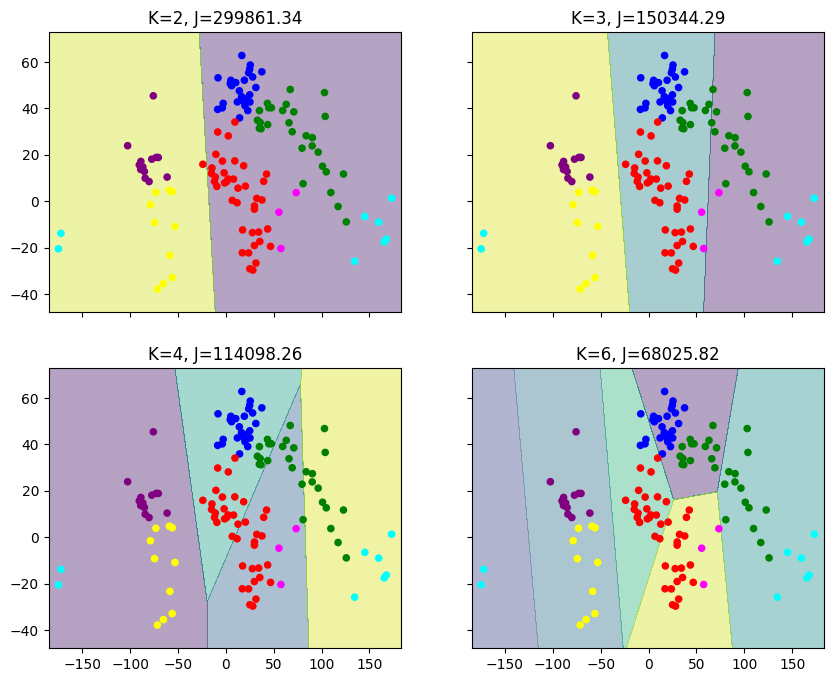

In [4]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

**QUESTION 2**

How can Inertia be used to compare clusters? Can you propose a better metric for spatial datasets?

Which is the main problem with the mercator representation for continent detection?

Here inertia is calculated with the distance of each point to its assigned centroid, some clusters are pretty well identified so their inertia will be low but for some clusters they will have a very high inertia because this representation is misleading.
Here we could use the silhouette metric which computes the average distance to other examples in the same cluster.
With the Mercator representation the latitudes -180 and 180 are considered far away even though they are geographically close.

## STEP 2: Spatial dataset normalization

**TO CODE 2.1**

Displace the origin of longitude to 30° east.

In [5]:
np1[:,0] #Displace longitude 30° east 
long_displaced = np1[:,0]-30
indices_to_normalize = np.where(long_displaced<-180)
print(long_displaced[np.where(long_displaced<-180)], 'to normalize')
long_displaced[np.where(long_displaced<-180)] = long_displaced[np.where(long_displaced<-180)]+360
print(long_displaced[indices_to_normalize], 'normalized')


[-202.1648506 -204.8098734] to normalize
[157.8351494 155.1901266] normalized


<module 'matplotlib.pyplot' from 'c:\\Users\\JERM\\anaconda3\\envs\\img_proc\\Lib\\site-packages\\matplotlib\\pyplot.py'>

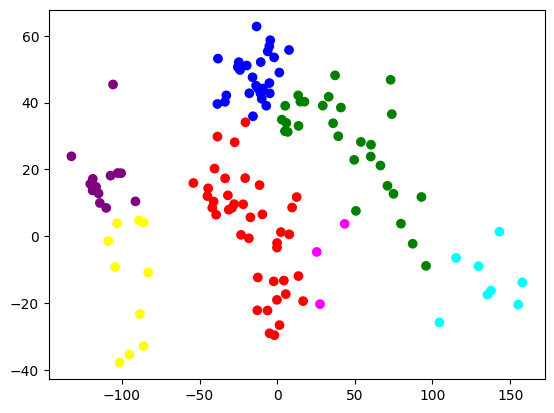

In [6]:
np1_d30 = np1.copy()
np1_d30[:,0] = long_displaced
plt.scatter(np1_d30[:,0], np1_d30[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt

**QUESTION 3**

What are the advantages of this normalization?

This normalization merges the Oceania continent.

**TO CODE 2.2**

Apply KMeans to the new normalized dataset.

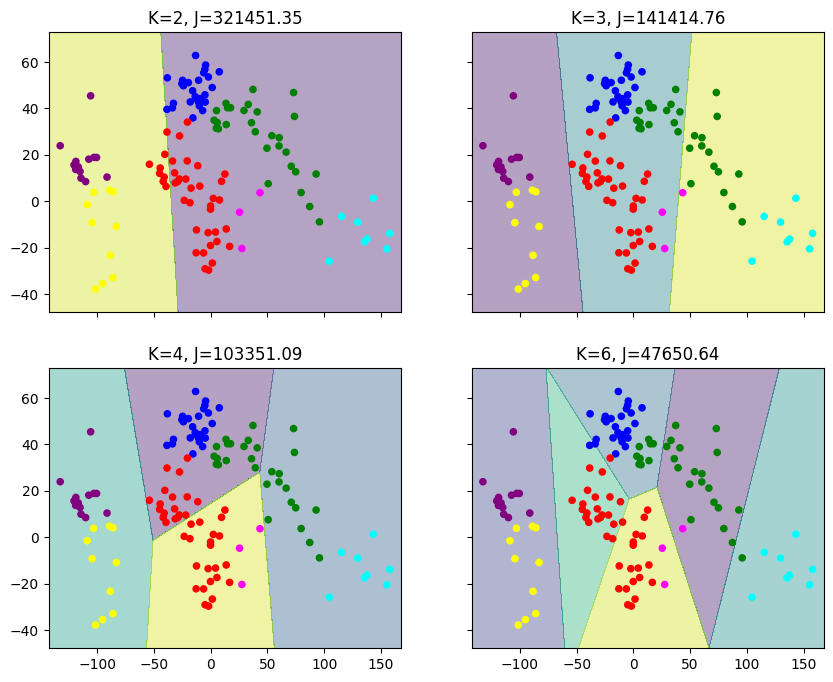

In [7]:
x_min, x_max = np1_d30[:, 0].min() - 10, np1_d30[:, 0].max() + 10
y_min, y_max = np1_d30[:, 1].min() - 10, np1_d30[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1_d30)
km3 = cluster.KMeans(n_clusters=3).fit(np1_d30)
km4 = cluster.KMeans(n_clusters=4).fit(np1_d30)
km6 = cluster.KMeans(n_clusters=6).fit(np1_d30)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1_d30[:, 0], np1_d30[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

Compared to the previous continent detection 

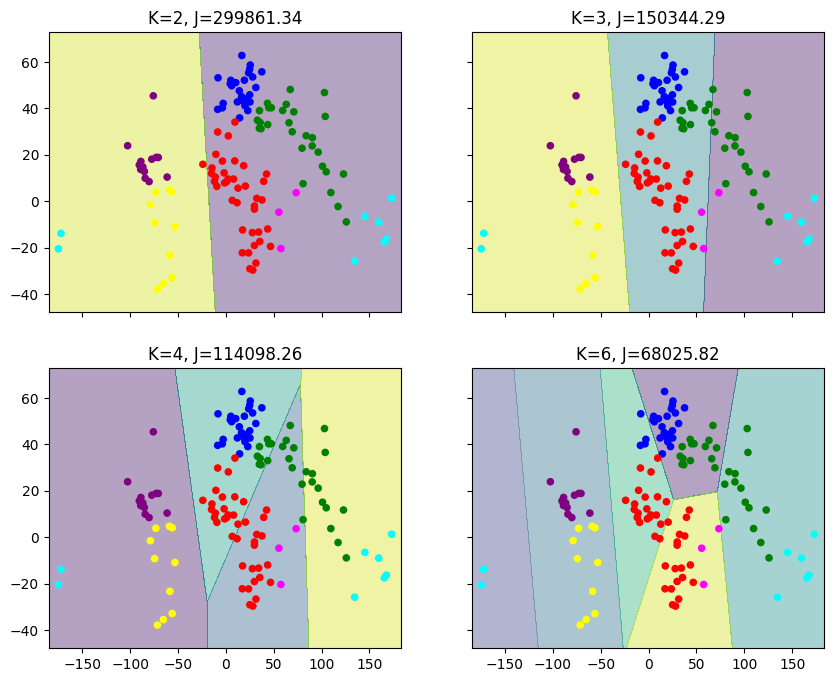

Oceania is now well detected as a single continent

Gaussian Mixture Model is a clustering method allowing soft boundaries.

This method can be used through a [sklearn function](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html "Gaussian Mixture")

**TO CODE 2.3**

Apply GMM to the normalized dataset.

You have to test 3 conditions:

- GMM with default parameters for 2, 3, 4 and 6 components

- GMM with diagonal covariance matrix for 2, 3, 4 and 6 components

- GMM with random initialization for 2, 3, 4 and 6 components

In [8]:
from sklearn.mixture import GaussianMixture

Default GMM

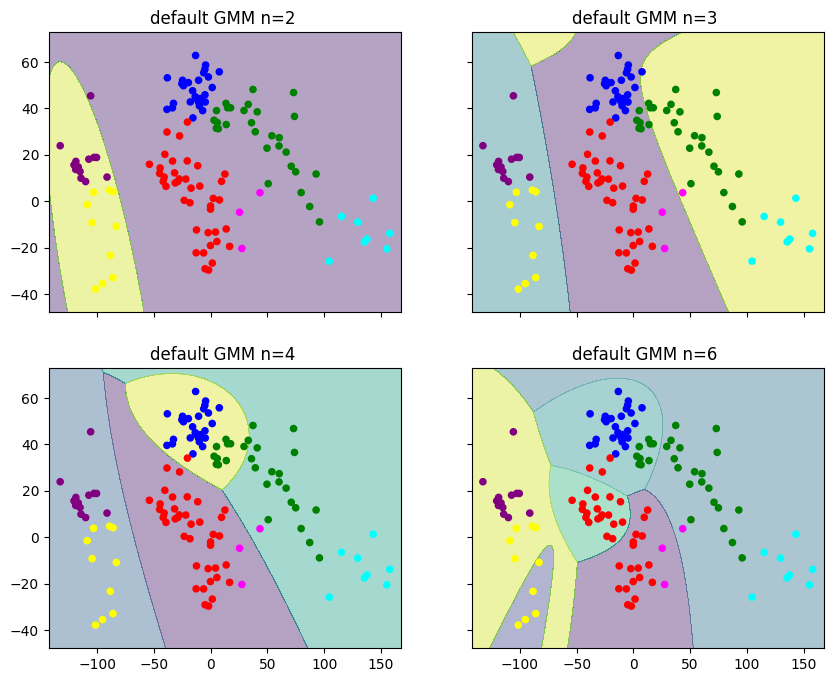

In [9]:
x_min, x_max = np1_d30[:, 0].min() - 10, np1_d30[:, 0].max() + 10
y_min, y_max = np1_d30[:, 1].min() - 10, np1_d30[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

defaultGMM2 = GaussianMixture(n_components=2,random_state=0).fit(np1_d30)
defaultGMM3 = GaussianMixture(n_components=3,random_state=0).fit(np1_d30)
defaultGMM4 = GaussianMixture(n_components=4,random_state=0).fit(np1_d30)
defaultGMM6 = GaussianMixture(n_components=6,random_state=0).fit(np1_d30)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, defaultGMM, tt in zip(product([0, 1], [0, 1]),
                        [defaultGMM2, defaultGMM3, defaultGMM4, defaultGMM6],
                        ["default GMM n=2 ",
                         "default GMM n=3 ", 
                         "default GMM n=4 ", 
                         "default GMM n=6 "]):
    Z = defaultGMM.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1_d30[:, 0], np1_d30[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

GMM with diagonal covariance

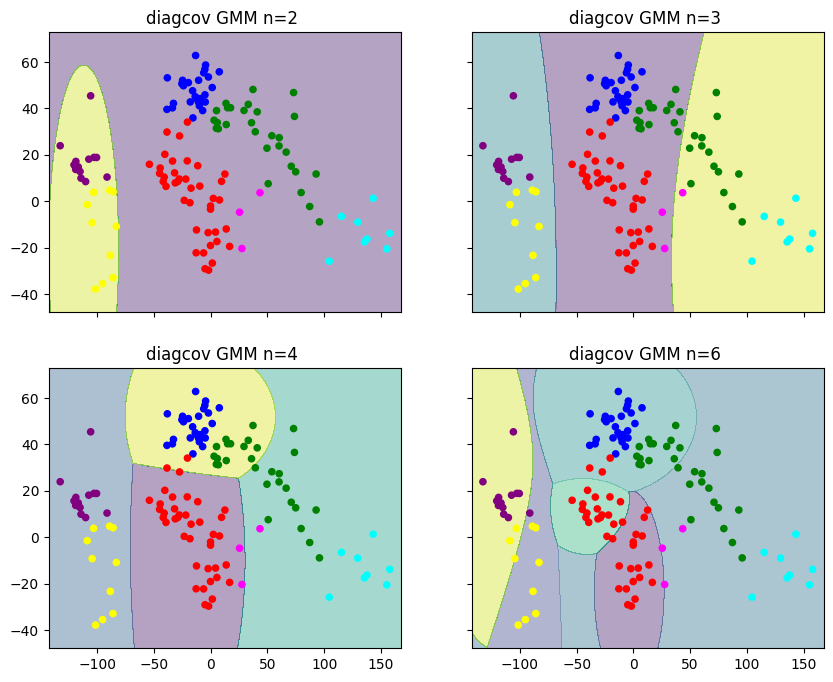

In [10]:
x_min, x_max = np1_d30[:, 0].min() - 10, np1_d30[:, 0].max() + 10
y_min, y_max = np1_d30[:, 1].min() - 10, np1_d30[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

diagcovGMM2 = GaussianMixture(n_components=2,random_state=0,covariance_type='diag').fit(np1_d30)
diagcovGMM3 = GaussianMixture(n_components=3,random_state=0,covariance_type='diag').fit(np1_d30)
diagcovGMM4 = GaussianMixture(n_components=4,random_state=0,covariance_type='diag').fit(np1_d30)
diagcovGMM6 = GaussianMixture(n_components=6,random_state=0,covariance_type='diag').fit(np1_d30)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, diagcovGMM, tt in zip(product([0, 1], [0, 1]),
                        [diagcovGMM2, diagcovGMM3, diagcovGMM4, diagcovGMM6],
                        ["diagcov GMM n=2 ",
                         "diagcov GMM n=3 ", 
                         "diagcov GMM n=4 ", 
                         "diagcov GMM n=6 "]):
    Z = diagcovGMM.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1_d30[:, 0], np1_d30[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

Random init GMM

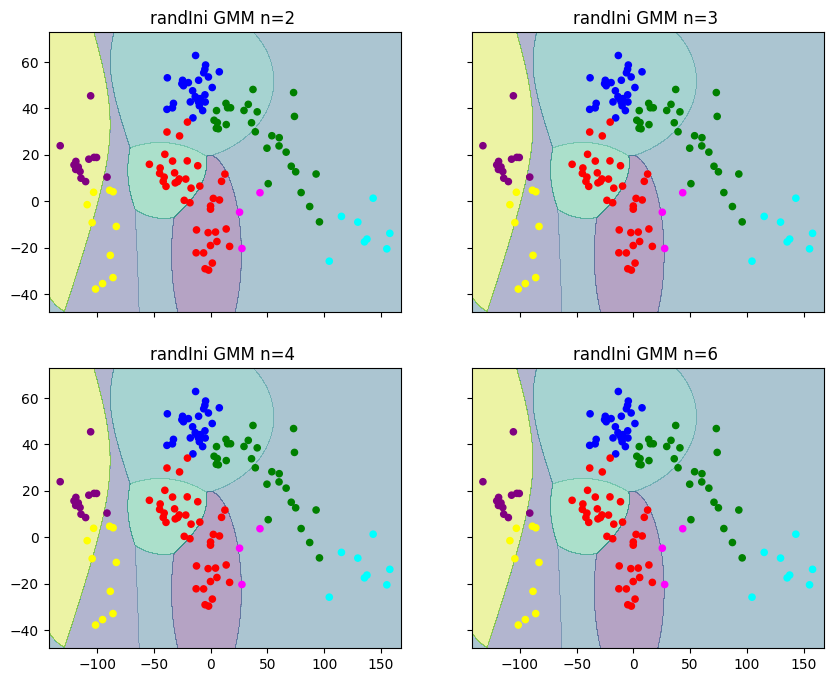

In [11]:
x_min, x_max = np1_d30[:, 0].min() - 10, np1_d30[:, 0].max() + 10
y_min, y_max = np1_d30[:, 1].min() - 10, np1_d30[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

randIniGMM2 = GaussianMixture(n_components=2,init_params='random').fit(np1_d30)
randIniGMM3 = GaussianMixture(n_components=3,init_params='random').fit(np1_d30)
randIniGMM4 = GaussianMixture(n_components=4,init_params='random').fit(np1_d30)
randIniGMM6 = GaussianMixture(n_components=6,init_params='random').fit(np1_d30)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, randIni, tt in zip(product([0, 1], [0, 1]),
                        [randIniGMM2, randIniGMM3, randIniGMM4, randIniGMM6],
                        ["randIni GMM n=2 ",
                         "randIni GMM n=3 ", 
                         "randIni GMM n=4 ", 
                         "randIni GMM n=6 "]):
    Z = diagcovGMM.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1_d30[:, 0], np1_d30[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

**QUESTION 4**

Which is the best method to detect continents?

For this method, what would be the probability to find a country in the coordinates [-50, -40]? What methodology can you think of to detect unpopulated oceans?

Continents generally have convex shapes so the k-means algorithm is appropriate, and I find the results of the k-means method generally a bit better than with the GMMs. I did note that the default GMM and the diagonal covariance GMM with n=4 are the best results for the GMMs.

There are no countries at coordinates [-50,-40]. To detect unpopulated oceans, we can calculate the distance from every point to the closest country. If this value is higher than a set threshold then this point is in an ocean.

**BONUS**

Rather than applying the previous longitudinal normalization in the mercator projected data and applying k-means, we could directly apply k-means on the unit-sphere representing the earth. The cosine similarity thus becomes a more suitable similarity measure than the euclidean distance.

Apply a KMeans with cosine similarity on the sphere instead of the previously tested euclidean distance in the plane.

## STEP 3: Detection of caribbean island 

**TO CODE 3.1**

Isolate the North and South American continents.

C:\Users\JERM\AppData\Local\Temp\ipykernel_22612\297642897.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])


<module 'matplotlib.pyplot' from 'c:\\Users\\JERM\\anaconda3\\envs\\img_proc\\Lib\\site-packages\\matplotlib\\pyplot.py'>

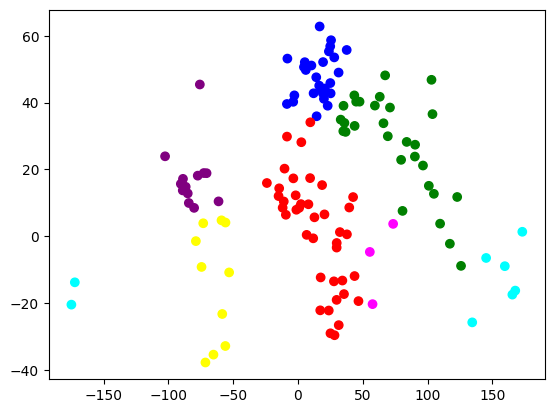

In [12]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt

In [13]:
print(np.where(df_Y==3)[0])
np1_NA = np1[np.where(df_Y==3)[0]]
print(np.where(df_Y==4)[0])
np1_SA = np1[np.where(df_Y==4)[0]]

[ 12  24  31  35  37  47  51  52  59  78  87  91 119]
[  4  17  27  29  36  50  93  94 111 125]


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

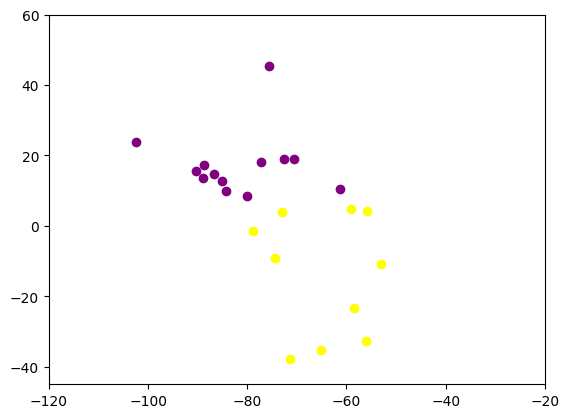

In [14]:
plt.scatter(np1_NA[:,0], np1_NA[:,1], c='purple')
plt.scatter(np1_SA[:,0], np1_SA[:,1], c='yellow')
plt.xlim(-120,-20)
plt.ylim(-45,60)
plt.plot

**TO CODE 3.2**

Propose a methodology to create a cluster including caribbean independent nations.

In [15]:
df1['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Estonia', 'Ethiopia', 'Fiji', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar',
       'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', '

Caribbean independant nations (Wiki)
Antigua and Barbuda (not in list)
Bahamas (not in list)
Barbados (not in list)
Cuba (not in list)
Dominica (not in list)
Dominican Republic
Grenada (not in list)
Haiti 
Jamaica
Saint Kitts and Nevis (Not in list)
Saint Lucia (Not in list)
Saint Vincent and the Grenadines(Not in list)
Trinidad and Tobago

States to consider : Dominican republic,   Haiti,   Jamaica,  Trinidad and Tobago

In [16]:
np_Y_Carab = np_Y.copy()

carab_indices = [np.where(df1['Country']=='Jamaica'),
                          np.where(df1['Country']=='Dominican Republic'),
                          np.where(df1['Country']=='Haiti'),
                          np.where(df1['Country']=='Trinidad and Tobago')]
for country in carab_indices :
        np_Y_Carab[country] = 7

np1_Carab = np1[carab_indices]

In [17]:
np1_NA[:,0]

array([ -88.71010486,  -75.697     ,  -84.19208768,  -70.50568896,
        -88.87164469,  -90.36482009,  -72.68527509,  -86.6151661 ,
        -77.31482593, -102.5234517 ,  -85.0305297 ,  -80.11915156,
        -61.26567923])

In [18]:
np1_Carab[:,0]

array([[[-77.31482593,  18.15694878]],

       [[-70.50568896,  18.89433082]],

       [[-72.68527509,  18.93502563]],

       [[-61.26567923,  10.45733408]]])

World map with Caribeans (Orange)

<module 'matplotlib.pyplot' from 'c:\\Users\\JERM\\anaconda3\\envs\\img_proc\\Lib\\site-packages\\matplotlib\\pyplot.py'>

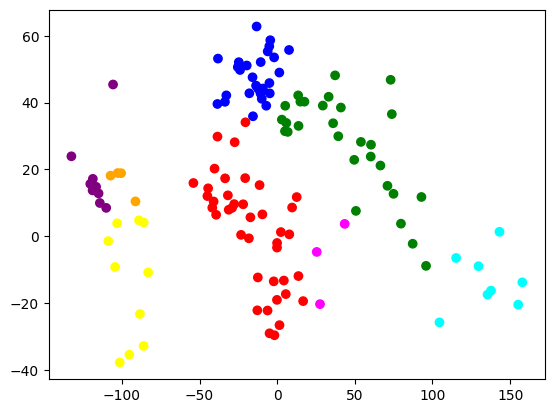

In [19]:
plt.scatter(np1_d30[:,0], np1_d30[:,1], c=np_Y_Carab, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan','orange']))
plt

Map of the Americas and Caribeans 

Refresh vectors NA, SA, car

In [20]:
np1_NA_Car = np1[np.where(np_Y_Carab==3)[0]]
np1_SA_Car = np1[np.where(np_Y_Carab==4)[0]]
np1_Carab = np1[np.where(np_Y_Carab==7)[0]]

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

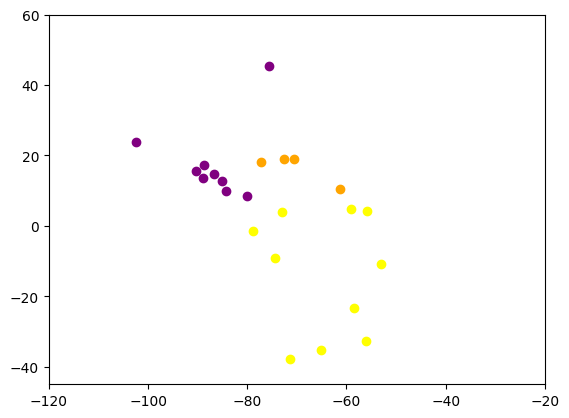

In [21]:
plt.scatter(np1_NA_Car[:,0], np1_NA_Car[:,1], c='purple')
plt.scatter(np1_SA_Car[:,0], np1_SA_Car[:,1], c='yellow')
plt.scatter(np1_Carab[:,0], np1_Carab[:,1], c='orange')
plt.xlim(-120,-20)
plt.ylim(-45,60)
plt.plot



Clustering

In [22]:
np1_NA_Car.shape


(9, 2)

In [23]:
np1_AmCar = np.vstack([np1_NA_Car,np1_SA_Car,np1_Carab])
np_Y_AmCar = np.hstack([np.ones(np1_NA_Car.shape[0]),2*np.ones(np1_SA_Car.shape[0]),3*np.ones(np1_Carab.shape[0])])

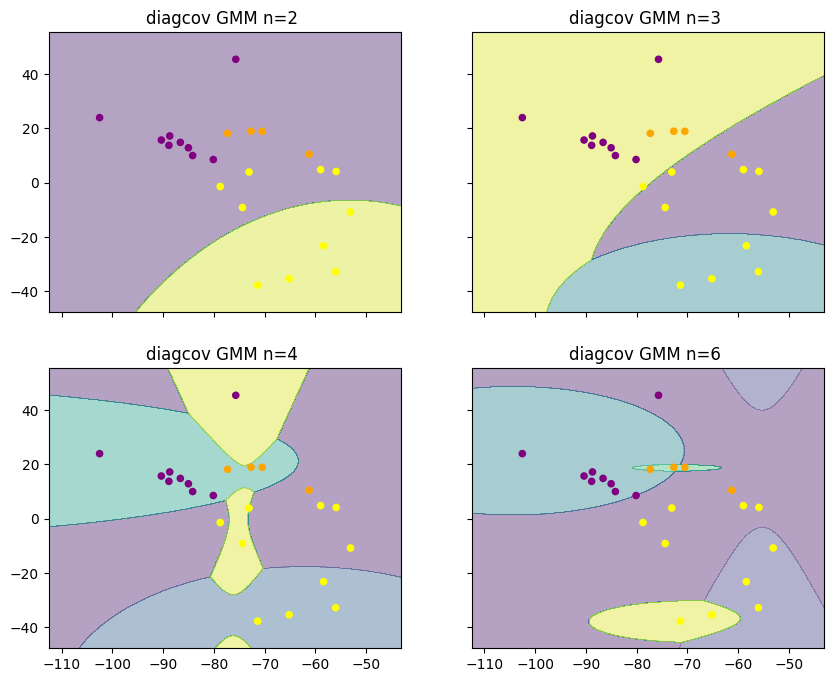

In [24]:
x_min, x_max = np1_AmCar[:, 0].min() - 10, np1_AmCar[:, 0].max() + 10
y_min, y_max = np1_AmCar[:, 1].min() - 10, np1_AmCar[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

diagcovGMM2 = GaussianMixture(n_components=2,random_state=0,covariance_type='diag').fit(np1_AmCar)
diagcovGMM3 = GaussianMixture(n_components=3,random_state=0,covariance_type='diag').fit(np1_AmCar)
diagcovGMM4 = GaussianMixture(n_components=4,random_state=0,covariance_type='diag').fit(np1_AmCar)
diagcovGMM6 = GaussianMixture(n_components=6,random_state=0,covariance_type='diag').fit(np1_AmCar)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, diagcovGMM, tt in zip(product([0, 1], [0, 1]),
                        [diagcovGMM2, diagcovGMM3, diagcovGMM4, diagcovGMM6],
                        ["diagcov GMM n=2 ",
                         "diagcov GMM n=3 ", 
                         "diagcov GMM n=4 ", 
                         "diagcov GMM n=6 "]):
    Z = diagcovGMM.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1_AmCar[:, 0], np1_AmCar[:, 1], c=np_Y_AmCar,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['purple', 'yellow','orange']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

plt.show()

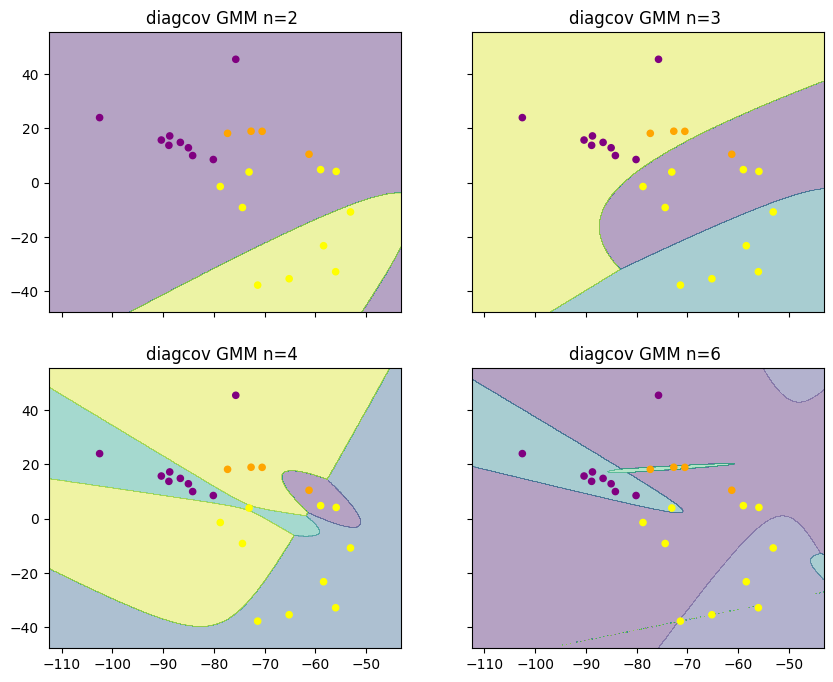

In [25]:
x_min, x_max = np1_AmCar[:, 0].min() - 10, np1_AmCar[:, 0].max() + 10
y_min, y_max = np1_AmCar[:, 1].min() - 10, np1_AmCar[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

regCovGMM2 = GaussianMixture(n_components=2,random_state=0).fit(np1_AmCar)
regCovGMM3 = GaussianMixture(n_components=3,random_state=0).fit(np1_AmCar)
regCovGMM4 = GaussianMixture(n_components=4,random_state=0).fit(np1_AmCar)
regCovGMM6 = GaussianMixture(n_components=6,random_state=0).fit(np1_AmCar)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, regCovGMM, tt in zip(product([0, 1], [0, 1]),
                        [regCovGMM2, regCovGMM3, regCovGMM4, regCovGMM6],
                        ["diagcov GMM n=2 ",
                         "diagcov GMM n=3 ", 
                         "diagcov GMM n=4 ", 
                         "diagcov GMM n=6 "]):
    Z = regCovGMM.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1_AmCar[:, 0], np1_AmCar[:, 1], c=np_Y_AmCar,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['purple', 'yellow','orange']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

plt.show()

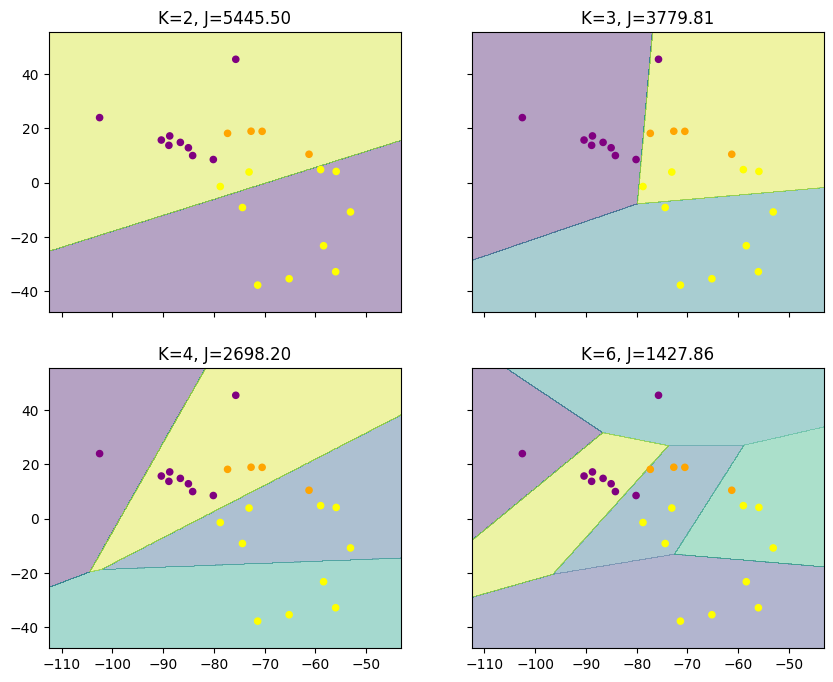

In [26]:
x_min, x_max = np1_AmCar[:, 0].min() - 10, np1_AmCar[:, 0].max() + 10
y_min, y_max = np1_AmCar[:, 1].min() - 10, np1_AmCar[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1_AmCar)
km3 = cluster.KMeans(n_clusters=3).fit(np1_AmCar)
km4 = cluster.KMeans(n_clusters=4).fit(np1_AmCar)
km6 = cluster.KMeans(n_clusters=6).fit(np1_AmCar)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1_AmCar[:, 0], np1_AmCar[:, 1], c=np_Y_AmCar,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['purple', 'yellow', 'orange']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

**QUESTION 5**

Which is the outlier of this clustering problem?

With k-means K=4 the result is pretty close, here the countries most to the north and north west in Northern America are outliers

## STEP 4 : Evaluating a cluster

In this section, we try to evaluate the quality of the different clusters computed.

**TO DO 4.1**
Execute the following cells. On the first cell, you can add code to once again displace the longitude by 30° east.

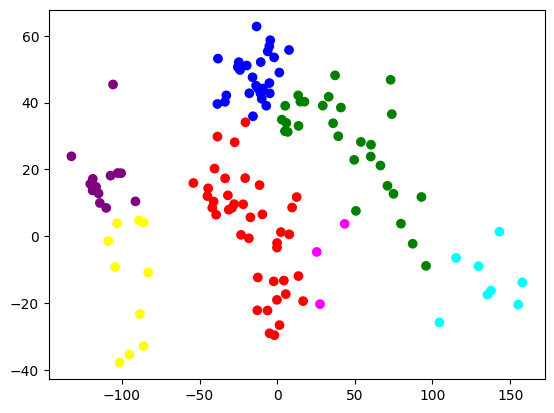

In [27]:
plt.scatter(np1_d30[:,0], np1_d30[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()


In [28]:
x_min, x_max = np1_d30[:, 0].min() - 10, np1_d30[:, 0].max() + 10
y_min, y_max = np1_d30[:, 1].min() - 10, np1_d30[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

For n_clusters = 3 The average silhouette_score is : 0.5399410318541973


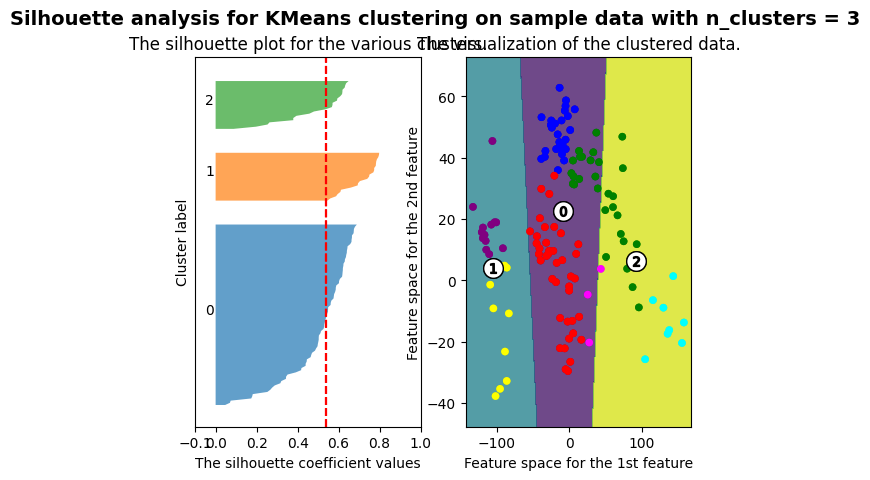

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1_d30) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1_d30)

silhouette_avg = silhouette_score(np1_d30, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1_d30, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1_d30[:, 0], np1_d30[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**TO DO 4.2**

Apply the previous code for different values of K (2,3,4 and 6).

For n_clusters = 2 The average silhouette_score is : 0.4500091692627439


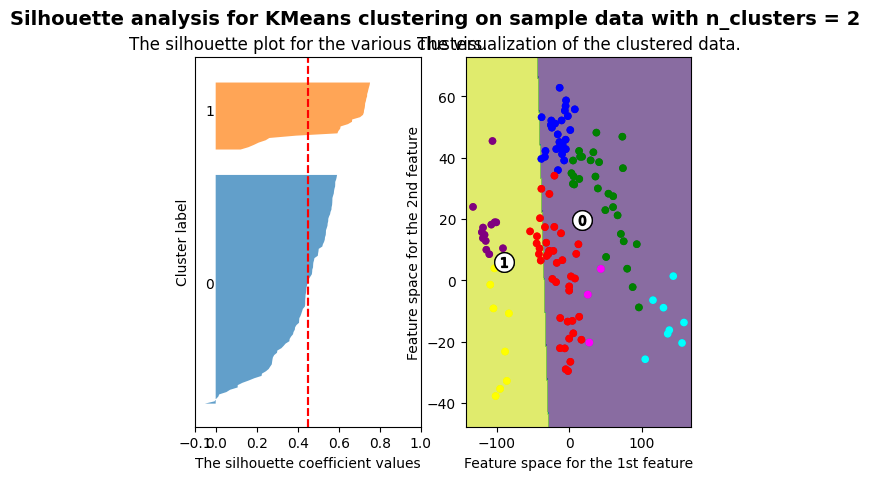

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 2

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1_d30) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1_d30)

silhouette_avg = silhouette_score(np1_d30, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1_d30, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1_d30[:, 0], np1_d30[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 4 The average silhouette_score is : 0.4875009627702223


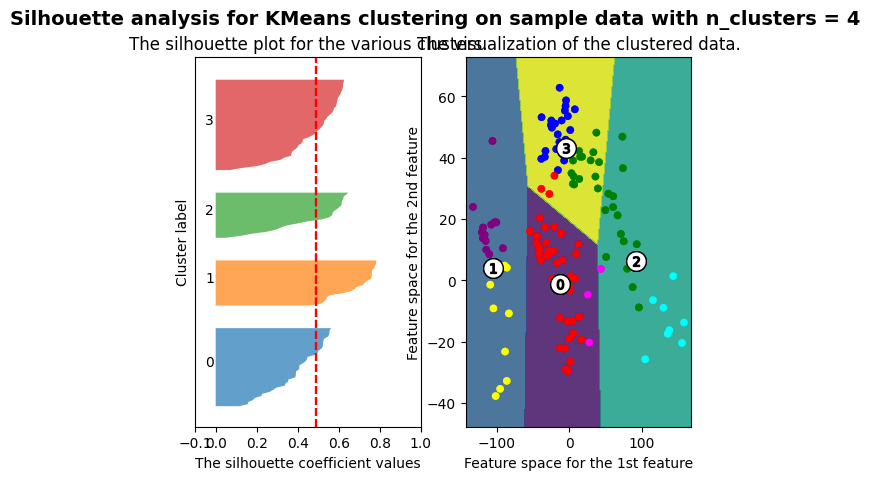

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 4

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1_d30) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1_d30)

silhouette_avg = silhouette_score(np1_d30, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1_d30, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1_d30[:, 0], np1_d30[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 6 The average silhouette_score is : 0.5172067215678542


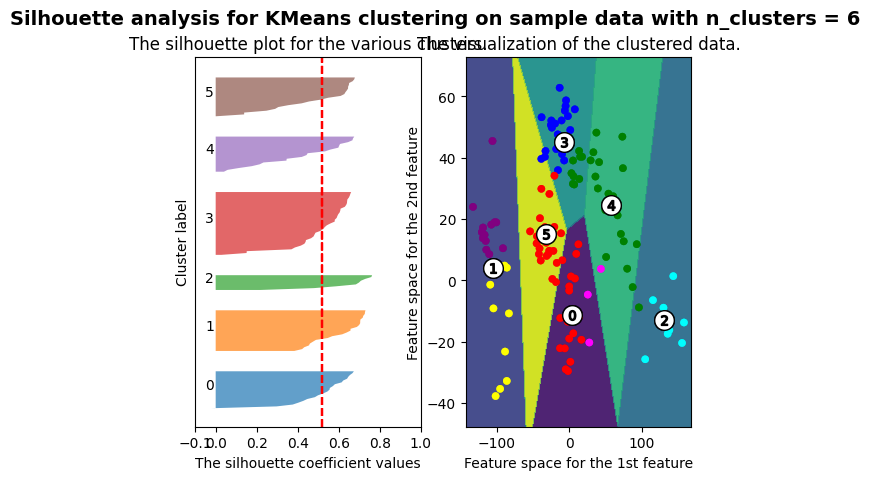

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 6

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1_d30) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1_d30)

silhouette_avg = silhouette_score(np1_d30, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1_d30, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1_d30[:, 0], np1_d30[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**Question 6** 

According to the silhouette score and the silhouette analysis, which is the most relevant value of K ? Justify your response.

According to the silhouette scores, the best values of K are K=3 (score =0.54) and K=6 (score =0.52)
However with 6 clusters, the continents are better separated and the result is closer to reality. So K=6 seems to be the most relevant.

**BONUS** 

Compute the silhouette score and analyze it for different number of components and parameters of Gaussian Mixture.

**TO CODE 4.3**

Another way to evaluate the quality of the clustering is through the homogeneity. This metric require a ground truth, so it can't be computed for every clustering problem. Luckily, we do have a ground truth here. Compute the [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html "Homogeneity score") for different values of K.

In [35]:
from sklearn.metrics import homogeneity_score
from itertools import product
from sklearn import cluster



K = 3

km = cluster.KMeans(n_clusters=K).fit(np1_d30)
cluster_labels = km.predict(np1_d30)
print(homogeneity_score(np_Y, cluster_labels))

K = 4

km = cluster.KMeans(n_clusters=K).fit(np1_d30)
cluster_labels = km.predict(np1_d30)
print(homogeneity_score(np_Y, cluster_labels))

K = 6

km = cluster.KMeans(n_clusters=K).fit(np1_d30)
cluster_labels = km.predict(np1_d30)
print(homogeneity_score(np_Y, cluster_labels))

K = 7

km = cluster.KMeans(n_clusters=K).fit(np1_d30)
cluster_labels = km.predict(np1_d30)
print(homogeneity_score(np_Y, cluster_labels))

K = 8

km = cluster.KMeans(n_clusters=K).fit(np1_d30)
cluster_labels = km.predict(np1_d30)
print(homogeneity_score(np_Y, cluster_labels))

K = 9

km = cluster.KMeans(n_clusters=K).fit(np1_d30)
cluster_labels = km.predict(np1_d30)
print(homogeneity_score(np_Y, cluster_labels))

K = 10

km = cluster.KMeans(n_clusters=K).fit(np1_d30)
cluster_labels = km.predict(np1_d30)
print(homogeneity_score(np_Y, cluster_labels))

K = 11

km = cluster.KMeans(n_clusters=K).fit(np1_d30)
cluster_labels = km.predict(np1_d30)
print(homogeneity_score(np_Y, cluster_labels))

0.4245233692113754
0.5480261473605239
0.7529877720208126
0.8468523164150249
0.7540649708314331
0.8564787764777644
0.8898005006109008
0.8639389596881454


**Question 7**

According to the homogeneity score, which is the most relevant value of K ?

According to the homogeneity score, the most relevant value of K is K=10

**BONUS**
Compute the homogeneity score and analyze it for different number of components and parameters of Gaussian Mixture.

## BONUS STEP 5: Alcoholism

This step is entirely optional and combines all the methods you used for this 3 TPs course.

The main goal is to develop a complete methodology to answer general questions.

All questions have to be justified by your homemade methodology and your methodology has also to be justified.

**QUESTION 1**

In the year 2000, which countries are heavily concerned by an Alcohol issue?

**QUESTION 2**

In these countries and in 2000, which are the parameters linked with Alcoholism? How do you explain these links?

**QUESTION 3**

Which is the evolution trend in these countries between 2000 and 2015? Try to separate these different trends.

**QUESTION 4**

By selecting a specific country, can you explain a decrease or an increase through specific policies?